In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from datetime import date
from sklearn.metrics import mean_absolute_percentage_error
import warnings

warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\Administrator\\Downloads\\VCB.csv')
df = df[['Price']]
df

,Price
0,11929.0
1,11841.0
2,11797.0
3,11885.0
4,11797.0
...,...
2491,81500.0
2492,81200.0
2493,81100.0
2494,80900.0


In [3]:
df['Target'] = df.Price.shift(-1)
df.dropna(inplace = True)
df.head()

,Price,Target
0,11929.0,11841.0
1,11841.0,11797.0
2,11797.0,11885.0
3,11885.0,11797.0
4,11797.0,11621.0


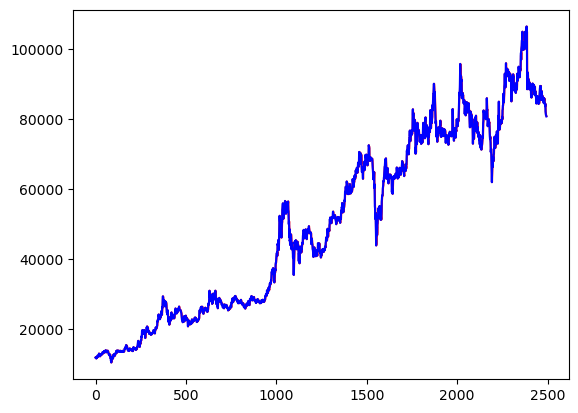

In [4]:
# gán biến
X = df[['Price']]
y = df[['Target']] # các biến độc lập

plt.plot(X, color = 'r')
plt.plot(y, color = 'b')
plt.show()

In [5]:
# chia train, test
train_size = int(0.7 * len(df))
test_size = len(df) - train_size

y_train = y[:train_size]
X_train = X[:train_size]
y_test = y[train_size:]
X_test = X[train_size:]

In [6]:
# tạo mô hình SVR
svr_rbf = SVR(kernel='rbf', C=1000)
svr_rbf.fit(X_train, y_train)

svr_poly = SVR(kernel='poly', C=1000, degree = 2)
svr_poly.fit(X_train, y_train)

SVR(C=1000, degree=2, kernel='poly')

In [7]:
# dự đoán giá đóng cửa trên tập kiểm tra
y_pred_rbf = svr_rbf.predict(X_test)
y_pred_rbf = y_pred_rbf.reshape(-1,1)

y_pred_poly = svr_poly.predict(X_test)
y_pred_poly = y_pred_poly.reshape(-1,1)

In [8]:
# tính toán độ chính xác của mô hình
from sklearn.metrics import mean_squared_log_error

mape_rbf = mean_absolute_percentage_error(y_test, y_pred_rbf) * 100
msle_rbf = mean_squared_log_error(y_test, y_pred_rbf)
test_rmse_rbf = np.sqrt(np.mean((y_pred_rbf - y_test)**2))

mape_poly = mean_absolute_percentage_error(y_test, y_pred_poly) * 100
msle_poly = mean_squared_log_error(y_test, y_pred_poly)
test_rmse_poly = np.sqrt(np.mean((y_pred_poly - y_test)**2))

print("RBF MAPE:", mape_rbf)
print("RBF MSLE: ",  msle_rbf)
print("RBF Testing RMSE:", test_rmse_rbf)

print("Poly MAPE:", mape_poly)
print("Poly MSLE:",  msle_poly)
print("Poly Testing RMSE:", test_rmse_poly)

RBF MAPE: 21.92471800634908
RBF MSLE:  0.12255284115032417
RBF Testing RMSE: 24611.32316410921
Poly MAPE: 17.218251147539913
Poly MSLE: 0.02855042285349495
Poly Testing RMSE: 16631.37508382544


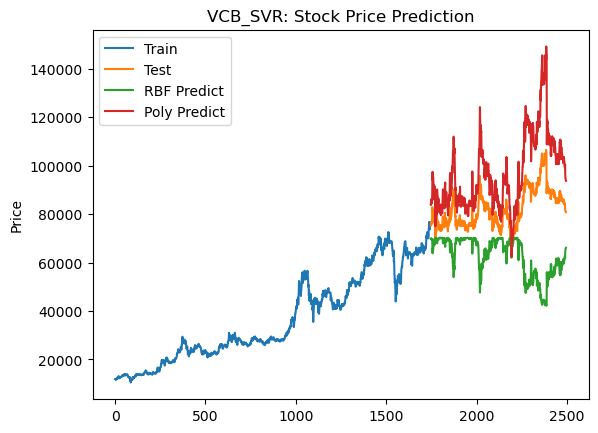

In [9]:
#vẽ mô hình
plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='RBF Predict')
plt.plot(X_test.index, y_pred_poly, label='Poly Predict')

plt.ylabel('Price')
plt.legend()
plt.title('VCB_SVR: Stock Price Prediction')
plt.show()

In [10]:
# lấy giá trị Close của ngày cuối cùng trong dataset
last_row = df.tail(1)
last_data = last_row['Price'].values.reshape(-1,1)
last_data

array([[80900.]])

In [11]:
# tạo mảng chứa giá trị predict của 30 ngày tiếp theo
x_next_30_days_rbf = []
x_next_30_days_poly = []
# predict giá Close 30 ngày tiếp theo dựa vào giá Close của ngày trước đó
for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days_rbf.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

for i in range(30):
    x_pred_next = svr_rbf.predict(last_data)
    x_next_30_days_poly.append(x_pred_next)
    last_data = x_pred_next.reshape(-1,1)

print("Kết quả dự đoán sử dụng RBF:", x_next_30_days_rbf)
print("Kết quả dự đoán sử dụng Poly:", x_next_30_days_poly)

Kết quả dự đoán sử dụng RBF: [array([66076.81671638]), array([66237.98200133]), array([66385.92357442]), array([66520.16153433]), array([66640.62294064]), array([66747.60048007]), array([66841.69014228]), array([66923.71764807]), array([66994.66298201]), array([67055.59050982]), array([67107.58958087]), array([67151.72793669]), array([67189.01814216]), array([67220.39582572]), array([67246.70774506]), array([67268.70744856]), array([67287.05640724]), array([67302.32878796]), array([67315.01840767]), array([67325.54677388]), array([67334.27143735]), array([67341.49414345]), array([67347.4684672]), array([67352.40676157]), array([67356.48634857]), array([67359.85494788]), array([67362.63537876]), array([67364.9295933]), array([67366.82210964]), array([67368.38291669])]
Kết quả dự đoán sử dụng Poly: [array([67369.66991964]), array([67370.73099074]), array([67371.60568342]), array([67372.32666144]), array([67372.92088776]), array([67373.4106119]), array([67373.81418872]), array([67374.1467

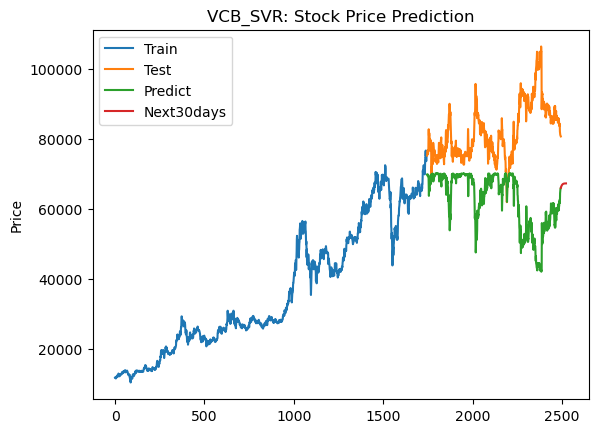

In [12]:
#vẽ mô hình

plt.plot(y_train, label='Train')
plt.plot(y_test, label='Test')
plt.plot(X_test.index, y_pred_rbf, label='Predict')

last_date = pd.to_datetime(X_test.index[1])  # Convert last index to datetime

next_dates = np.arange(2494, 2524)

plt.plot(next_dates, x_next_30_days_rbf, label='Next30days')

plt.ylabel('Price')
plt.title('VCB_SVR: Stock Price Prediction')
plt.legend()
plt.show()
